<a href="https://colab.research.google.com/github/SebastianPerezCalle/SENALES-Y-SISTEMAS-2025-1/blob/main/Parciales/Parcial1_Sebast%C3%ADan_Perez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pregunta 1

Se tiene un microprocesador de 5 bits con entrada analógica de -3.3 a 3 [V].  Diseñe el sistema de acondicionamiento y digitalización para la señal:  $x(t) = 3 \cos(1000\pi t) + 5 \sin(2000\pi t) + 10 \cos(11000\pi t)$.  Presente las simulaciones y gráficas de los procedimientos más representativos en un cuaderno de Python, incluyendo al menos dos períodos de la señal estudiada.


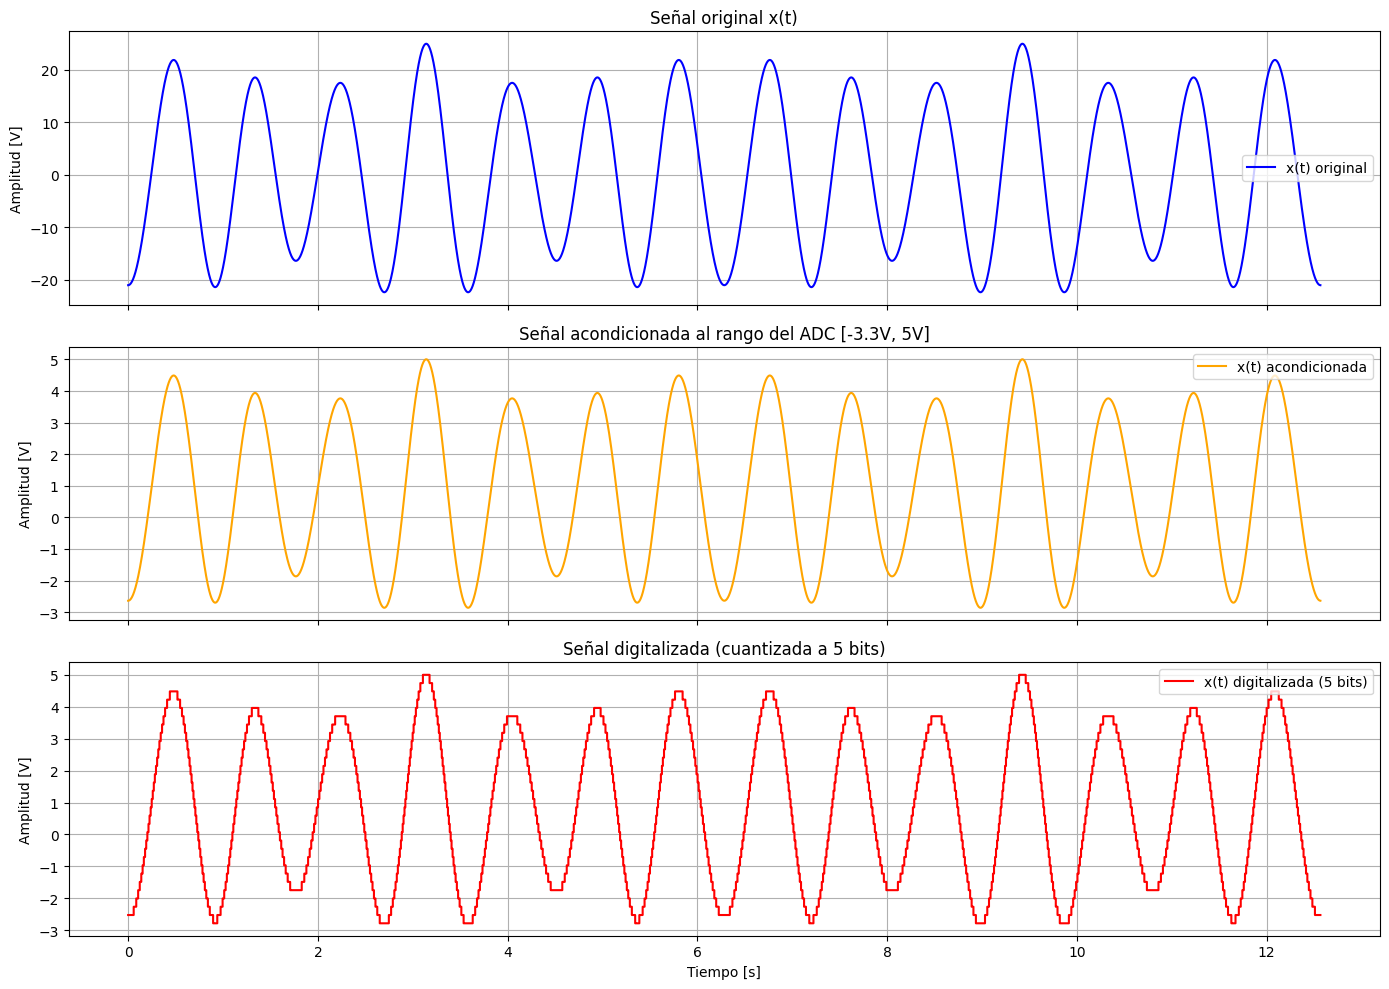

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de simulación
fs = 1000  # Frecuencia de muestreo para la visualización [Hz]
T = 2 * np.pi  # Aproximamos un periodo como 2π para representar correctamente
t = np.linspace(0, 2*T, int(fs*2*T), endpoint=False)

# Señal original
x = 20 * np.sin(7*t - np.pi/2) - 3 * np.cos(5*t) + 2 * np.cos(10*t)

# Rango del microprocesador [-3.3V, 5V]
v_min = -3.3
v_max = 5.0

# Rango de la señal x(t) (teórico)
x_min = -25
x_max = 25

# Cálculo de la transformación lineal
a = (v_max - v_min) / (x_max - x_min)
b = v_min - a * x_min

# Señal acondicionada
y = a * x + b

# ADC de 5 bits
n_bits = 5
levels = 2**n_bits
res = (v_max - v_min) / levels

# Cuantización
digital = np.round((y - v_min) / res) * res + v_min

# Crear tres subgráficas para visualizar cada etapa por separado

fig, axs = plt.subplots(3, 1, figsize=(14, 10), sharex=True)

# Señal original
axs[0].plot(t, x, color='blue', label='x(t) original')
axs[0].set_title('Señal original x(t)')
axs[0].set_ylabel('Amplitud [V]')
axs[0].grid(True)
axs[0].legend()

# Señal acondicionada
axs[1].plot(t, y, color='orange', label='x(t) acondicionada')
axs[1].set_title('Señal acondicionada al rango del ADC [-3.3V, 5V]')
axs[1].set_ylabel('Amplitud [V]')
axs[1].grid(True)
axs[1].legend()

# Señal digitalizada
axs[2].step(t, digital, where='mid', color='red', label='x(t) digitalizada (5 bits)')
axs[2].set_title('Señal digitalizada (cuantizada a 5 bits)')
axs[2].set_xlabel('Tiempo [s]')
axs[2].set_ylabel('Amplitud [V]')
axs[2].grid(True)
axs[2].legend()

plt.tight_layout()
plt.show()



# Pregunta 2

Cuál es la señal obtenida en tiempo discreto al utilizar un conversor análogo digital de 5 bits con frecuencia de muestreo de $5kHz$, entrada análoga de -3.3 a 3.3 [v], aplicado a la señal continua $x(t) = 3 \cos(1000\pi t) +
5 \sin(2000\pi t) + 10 \cos(11000\pi t)$?. Realizar la simulación del proceso de digitalización incluyendo al menos 3 ciclos de la señal $x(t)$.

En caso de que la digitalización no sea apropiada, diseñe e implemente un conversor adecuado para la señal estudiada. El convesor debe permitir configurar la cantidad de bits, rango de la entrada análoga y la frecuencia de muestreo, indicándole al usuario si dicha frecuencia es apropiada o no, y graficar la señal continua, discreta y digital.

# Desarrollo
Definimos la función para generar el cero y la pendiente en cada punto de la discretización.
En la práctica, el proceso de calcular líneas tangentes a una señal puede resultar útil para una variedad de aplicaciones, como en el procesamiento de señales, donde la pendiente de una señal se puede utilizar para determinar la tasa de cambio de una cantidad física, como la temperatura. , presión o velocidad.

In [ ]:
def my_ceropen(x,ymin = -5, ymax = 5): #Definimos la funcion ceropen para tomar la pendiente de cada punto discretizado en la señal
    xmax = max(x) # x.max()
    xmin = min(x) # x.min()
    m = (ymax - ymin)/(xmax - xmin)#pendiente de la recta a partir de 2 puntos
    c = ymin - m*xmin #corresponde al punto de intersección de la recta
    yv = m*x + c #Asignamos a yv la ecuacion de la recta análoga a y = mx + b
    return yv #retornamos las rectas

Definimos la función para cuantizar punto a punto. El proceso de cuantificación normalmente implica mapear cada valor continuo de la señal al valor discreto más cercano dentro de un rango específico. El rango de valores discretos suele estar determinado por el número de bits utilizados para representar la señal cuantificada.

In [ ]:
def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind] #retorna un nuevo vector con atributos de ind

# Conversor análogo digital
Realicé la discretización de la señal de acuerdo a la frecuencia de muestreo Fs = 5000 Hz.
En dicho proceso el coversor convierte una señal analógica en una señal digital muestreando la señal en intervalos específicos y asignando un valor digital a cada muestra.

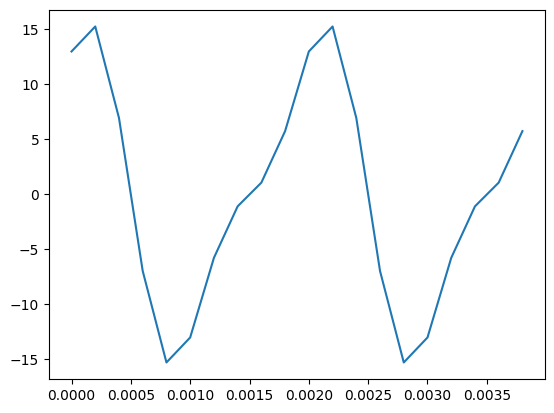

(20, 8)

In [ ]:
import numpy as np #importamos la librería numpy con el alias de np --> para que reciba los arreglos
import matplotlib.pyplot as plt #importamos la librería de matplotlib.pyplot co el alias de plt --> para graficar
from scipy.spatial.distance import cdist #importamos esta libreria para calcular distancias entre pares de puntos o conjuntos de puntos en un espacio vectorial

#Definimos la señal 1
w1 = 1000*np.pi #Velocidad angular
F1 = w1/(2*np.pi) #Frecuencia
T1 = 1/F1 #Periodo
A1= 3 #Amplitud

#Señal 2
w2 = 2000*np.pi
F2 = w2/(2*np.pi)
T2 = 1/F2
A2= 5

#Señal 3
w3 = 11000*np.pi
F3 = w3/(2*np.pi)
T3 = 1/F3
A3 = 10

Fs = 5000 #Fs corresponde al a fecuencia que nos dan en el ejercicio
Ts = 1/Fs #El periodo es inverso a la frecuencia
tv = np.arange(0,2*T1,Ts)#procesar dos periodos discretizados
#inicio en 0 y fin en 2 veces T1, dando saltos cada Ts (Está siguiendo al periodo de la señal más lenta)
y = 13*np.cos(w1*tv) + A2*np.sin(w2*tv) #Al discretizar la función original, encontramos que la señal 3 era copia de la señal 1 por tanto al tener la misma frecuencia se suman

#Mostramos en pantalla la señal
plt.plot(tv,y) #señal graficada
plt.show() #muestra la señal

#cero y pendiente
ycs = my_ceropen(y, ymin=-5,ymax=5) #Escalamos"y" de acuerdo a los valores que va tomando la pendiente en cada recta
#Establecemos los límites en el eje y, la amplitud más alta de la señal es 10, por tanto centralizamos la señal
#de -5 a 5 hay 10 unidades

#número de bits y vector de cuantización
nbits = 3
rmin = -5
rmax = 5
ve = np.linspace(rmin,rmax,2**nbits) # (rmax-rmin)/(2^#bits - 1) -> si se quiere incluir rmin y rmax

#distancias y cero pendiente a vector cuantizacion
d = cdist(ycs.reshape(-1,1),ve.reshape(-1,1)) #se utiliza reshape(-1,1) para generar vectores columna como lo pide cdist
d.shape # d es una matriz de 500 x 8, ej: la fila 1 incluye la distancia euclidea entre y[0] y los 8 elementos en ve

Recorremos el vector cero y la señal discretizada para cuantizar con el objetivo de que durante el proceso de cuantificación garanticemos que cada muestra se cuantice individualmente

In [ ]:
for i in range(ycs.shape[0]): #Para cada i que esté en el rango ()
   if i==0: #primera muestra
     yq = my_cuantizador(ycs[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(ycs[i],ve)) #apilar datos cuantizando si i>0

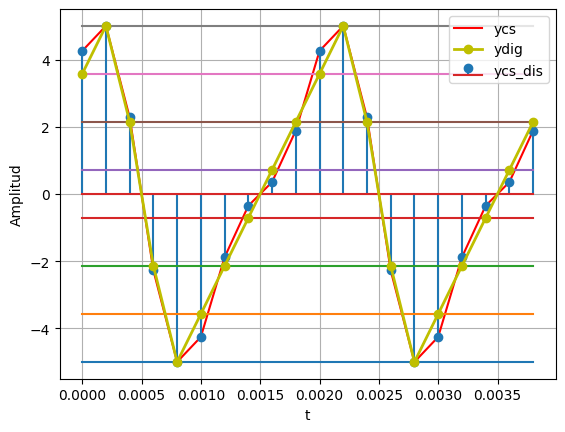

In [ ]:
#graficar señales

plt.plot(tv,ycs,c='r', label='ycs')#cs continua

plt.stem(tv,ycs, label='ycs_dis')#cs discreta

#estados de cuantización

for v in ve:
  plt.plot(tv,v*np.ones(len(tv)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(tv,yq,c='y',marker='o',label='ydig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

# Señal discretizada con la frecuencia apropiada
Al comprobar por medio de Nyquist, la fecuencia maxima entre las 3 señales dió mayor a la frecuencia otorgada en el ejercicio y por ende, para que la frecuencia sea apropiada debe ser:

Fs >= 2 * F(maxima) de (F1,F2,F3) --> Frecuencia de las señales.

 La frecuencia de discretización y la resolución de cuantificación son consideraciones importantes en la conversión de una señal analógica a una señal digital. La frecuencia de discretización debe ser lo suficientemente alta para capturar con precisión el componente de frecuencia más alta de la señal, mientras que la resolución de la cuantificación debe ser lo suficientemente alta para mantener la exactitud y precisión deseadas de la señal digital.

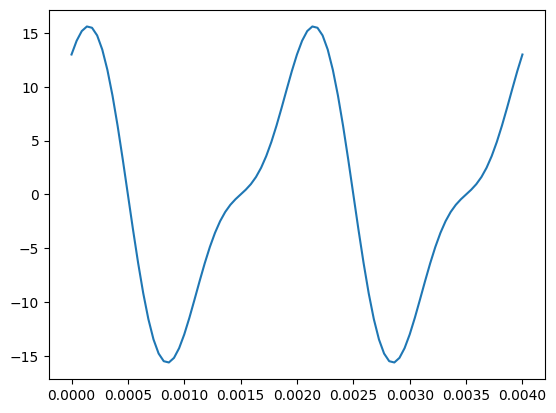

(89, 8)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

#Señal 1
w1 = 1000*np.pi
F1 = w1/(2*np.pi)
T1 = 1/F1
A1= 3

#Señal 2
w2 = 2000*np.pi
F2 = w2/(2*np.pi)
T2 = 1/F2
A2= 5

#Señal 3
w3 = 11000*np.pi
F3 = w3/(2*np.pi)
T3 = 1/F3
A3 = 10

Fs = 22000 #Hicimos el cambio de la frecuencia a 2 la frecuencia máxima entre las 3 señales
#Fmaxima = 5500  y 2(5500) = 11000
Ts = 1/Fs
tv = np.arange(0,2*T1,Ts)#procesar dos periodos discretizados
y = 13*np.cos(w1*tv) + A2*np.sin(w2*tv)

plt.plot(tv,y) #señal graficada
plt.show()

#cero y pendiente
ycs = my_ceropen(y, ymin=-5,ymax=5) #escalamos "y" de acuerdo a los valores que va tomando la pendiente en cada recta

#número de bits y vector de cuantización
nbits = 3
rmin = -5
rmax = 5
ve = np.linspace(rmin,rmax,2**nbits) # (rmax-rmin)/(2^#bits - 1) -> si se quiere incluir rmin y rmax

#distancias y cero pendiente a vector cuantizacion
d = cdist(ycs.reshape(-1,1),ve.reshape(-1,1)) #se utiliza reshape(-1,1) para generar vectores columna como lo pide cdist
d.shape # d es una matriz de 500 x 8, ej: la fila 1 incluye la distancia euclidea entre y[0] y los 8 elementos en ve

In [ ]:
#recorrer vector cero y spam discretizado para cuantizar

for i in range(ycs.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(ycs[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(ycs[i],ve)) #apilar datos cuantizando si i>0

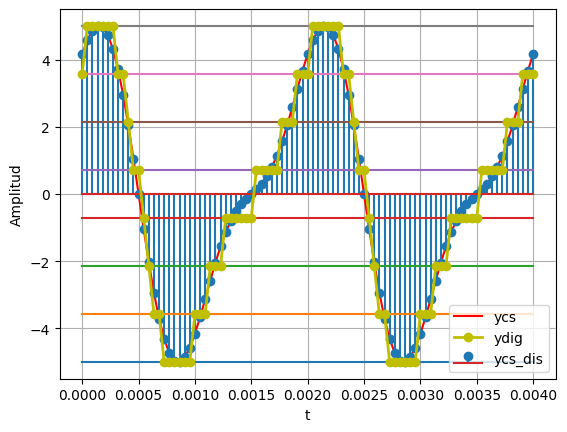

In [ ]:
#graficar señales

plt.plot(tv,ycs,c='r', label='ycs')#cs continua

plt.stem(tv,ycs, label='ycs_dis')#cs discreta

#estados de cuantización

for v in ve:
  plt.plot(tv,v*np.ones(len(tv)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(tv,yq,c='y',marker='o',label='ydig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

# Pregunta 3

La distancia media entre dos señales \( x_1(t), x_2(t) \in \mathbb{R}, \mathbb{C} \) se puede expresar a partir de la potencia media:

\[
d(x_1, x_2) = \overline{P}_{x_1 - x_2} = \lim_{T \to \infty} \frac{1}{T} \int_0^T |x_1(t) - x_2(t)|^2 \, dt
\]

Sean las señales:

\[
x_1(t) = A \cos(w_0 t), \quad w_0 = \frac{2 \pi}{T}, \quad T, A \in \mathbb{R}^+
\]

\[
x_2(t) = \begin{cases}
1 & 0 \leq t < \frac{T}{4} \\
-1 & \frac{T}{4} \leq t < \frac{3T}{4} \\
1 & \frac{3T}{4} \leq t < T
\end{cases}
\]

**¿Cuál es la distancia media entre las señales?**  
Corrobore sus desarrollos con Sympy.


In [ ]:
import sympy as sp

# Definir símbolos
t, T, A = sp.symbols('t T A', real=True, positive=True)
w0 = 2 * sp.pi / T

# Definir x1(t) y x2(t)
x1 = A * sp.cos(w0 * t)

# Definir x2(t) por partes
x2 = sp.Piecewise(
    (1, (t >= 0) & (t < T/4)),
    (-1, (t >= T/4) & (t < 3*T/4)),
    (1, (t >= 3*T/4) & (t < T))
)

# Definir integrando (x1 - x2)^2
integrando = (x1 - x2)**2

# Calcular integral en cada tramo
int1 = sp.integrate(integrando, (t, 0, T/4))
int2 = sp.integrate(integrando, (t, T/4, 3*T/4))
int3 = sp.integrate(integrando, (t, 3*T/4, T))

# Sumar las integrales y dividir por T para la distancia media
distancia_media = (int1 + int2 + int3) / T
distancia_media_simplificada = sp.simplify(distancia_media)

print("Distancia media simbólica:")
sp.pprint(distancia_media_simplificada)


Distancia media simbólica:
 2          
A    4⋅A    
── - ─── + 1
2     π     


# Pregunta 4

Sea \( x''(t) \) la segunda derivada de la señal \( x(t) \), definida en el intervalo \( [t_i, t_f] \).

Se demuestra que los coeficientes exponenciales de la serie de Fourier pueden calcularse según:

\[
c_n = \frac{1}{(t_i - t_f) n^2 \omega_0^2} \int_{t_i}^{t_f} x''(t) \, e^{-j n \omega_0 t} \, dt, \quad n \in \mathbb{Z}
\]

donde \( \omega_0 = \frac{2 \pi}{T} \) es la frecuencia angular fundamental y \( T = t_f - t_i \).

---

**Preguntas:**

1. ¿Cómo se pueden calcular los coeficientes \( a_n \) y \( b_n \) de la serie trigonométrica de Fourier a partir de \( x''(t) \)?

2. Encuentre el espectro de Fourier (magnitud, fase, parte real, parte imaginaria) y el error relativo de reconstrucción para \( n \in \{0, \pm1, \pm2, \pm3, \pm4, \pm5\} \) a partir de \( x''(t) \) para la señal \( x(t) \) mostrada en la Figura 1.

3. Compruebe el espectro obtenido con la estimación a partir de \( x(t) \) directamente y presente las respectivas simulaciones en Python.

---

**Nota:**  
Para la relación entre coeficientes exponenciales \( c_n \) y los coeficientes trigonométricos \( a_n, b_n \), se utiliza_


n	 c_n			 a_n		 b_n
-5	 0.000000-0.000000j	 0.000000	 0.000000
-4	 0.000000-0.000000j	 0.000000	 0.000000
-3	 -0.000000-0.000000j	 0.000000	 0.000000
-2	 0.250000-0.000000j	 0.000000	 0.000000
-1	 -0.000000-0.000000j	 0.000000	 0.000000
0	 0.000000+0.000000j	 0.000000	 0.000000
1	 -0.000000-0.000000j	 -0.000000	 0.000000
2	 0.250000-0.000000j	 0.500000	 0.000000
3	 -0.000000-0.000000j	 -0.000000	 0.000000
4	 0.000000-0.000000j	 0.000000	 0.000000
5	 0.000000-0.000000j	 0.000000	 0.000000


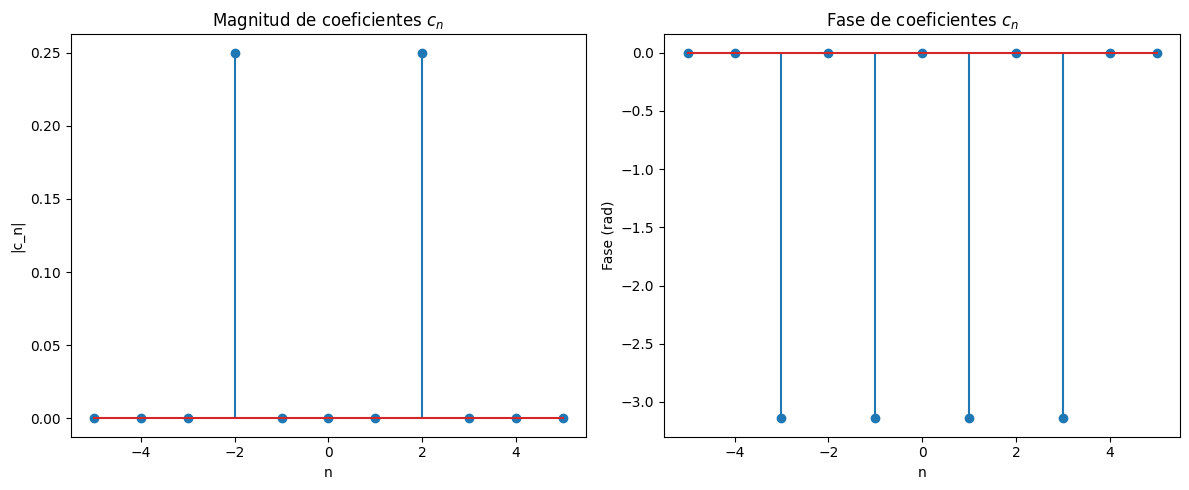

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Periodo y frecuencia angular fundamental
Ti, Tf = 0, 2*np.pi
T = Tf - Ti
w0 = 2 * np.pi / T

# Definición de la señal x(t) (Ejemplo representativo)
def x(t):
    return np.sin(t) + 0.5 * np.cos(2*t)

# Derivadas
def dx(t):
    return np.cos(t) - 1.0 * np.sin(2*t)

def ddx(t):
    return -np.sin(t) - 2.0 * np.cos(2*t)

# Función para calcular c_n desde x''(t)
def c_n(n):
    if n == 0:
        # Coeficiente c0 (promedio)
        integrand = lambda t: x(t)
        integral, _ = quad(integrand, Ti, Tf)
        return integral / T
    else:
        integrand = lambda t: ddx(t) * np.exp(-1j * n * w0 * t)
        integral, _ = quad(integrand, Ti, Tf)
        return integral / (T * (1j * n * w0)**2)

# Valores de n para coeficientes
n_vals = range(-5, 6)
c_vals = np.array([c_n(n) for n in n_vals])

# Obtener a_n y b_n para n>0
a_vals = np.zeros_like(c_vals.real)
b_vals = np.zeros_like(c_vals.real)

for i, n in enumerate(n_vals):
    if n == 0:
        a_vals[i] = 2 * c_vals[i].real
        b_vals[i] = 0
    elif n > 0:
        a_vals[i] = 2 * c_vals[i].real
        b_vals[i] = -2 * c_vals[i].imag
    else:
        a_vals[i] = 0
        b_vals[i] = 0

# Mostrar resultados
print("n\t c_n\t\t\t a_n\t\t b_n")
for i, n in enumerate(n_vals):
    print(f"{n}\t {c_vals[i]:.6f}\t {a_vals[i]:.6f}\t {b_vals[i]:.6f}")

# Graficar espectro
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.stem(n_vals, np.abs(c_vals))
plt.title('Magnitud de coeficientes $c_n$')
plt.xlabel('n')
plt.ylabel('|c_n|')

plt.subplot(1,2,2)
plt.stem(n_vals, np.angle(c_vals))
plt.title('Fase de coeficientes $c_n$')
plt.xlabel('n')
plt.ylabel('Fase (rad)')

plt.tight_layout()
plt.show()
